# RNN

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding,LSTM
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.utils import pad_sequences
# Set random seed for reproducibility
np.random.seed(42)

# Load Reuters dataset
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

# Preprocess data
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define RNN model
model = Sequential()
model.add(Embedding(10000, 32, input_length=max_words))
model.add(SimpleRNN(64, return_sequences=True))
#model.add(SimpleRNN(64, return_sequences=True))
#model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(100))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# Train model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

# Evaluate model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


2110848/2110848 [==============================] - 0s 0us/step
Epoch 1/10
71/71 [==============================] - 40s 535ms/step - loss: 2.5258 - acc: 0.3333 - val_loss: 2.3726 - val_acc: 0.3847
Epoch 2/10
71/71 [==============================] - 24s 338ms/step - loss: 2.1866 - acc: 0.4181 - val_loss: 2.6803 - val_acc: 0.3762
Epoch 3/10
71/71 [==============================] - 25s 349ms/step - loss: 2.1393 - acc: 0.4620 - val_loss: 2.0735 - val_acc: 0.4377
Epoch 4/10
71/71 [==============================] - 25s 357ms/step - loss: 1.6191 - acc: 0.5842 - val_loss: 1.9674 - val_acc: 0.4915
Epoch 5/10
71/71 [==============================] - 24s 339ms/step - loss: 1.3040 - acc: 0.6730 - val_loss: 1.9038 - val_acc: 0.5267
Epoch 6/10
71/71 [==============================] - 24s 339ms/step - loss: 1.0079 - acc: 0.7493 - val_loss: 2.0063 - val_acc: 0.5027
Epoch 7/10
71/71 [==============================] - 24s 341ms/step - loss: 0.7965 - acc: 0.8085 - val_loss: 2.1180 - val_acc: 0.5142
Epoch 

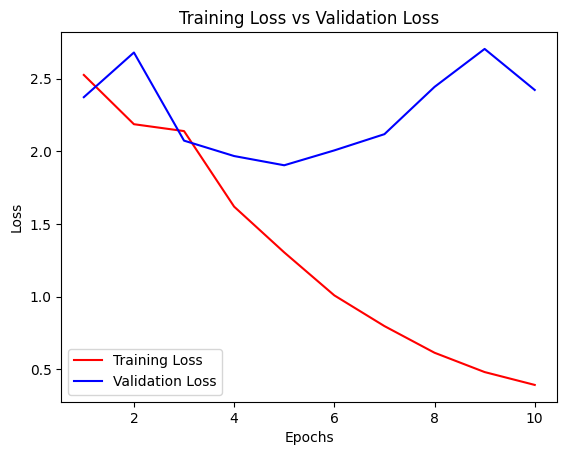

In [2]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# LSTM

In [3]:

# Define LSTM model
model = Sequential()
model.add(Embedding(10000, 32, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Evaluate model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/5
141/141 [==============================] - 68s 468ms/step - loss: 2.5231 - accuracy: 0.3478 - val_loss: 2.1243 - val_accuracy: 0.4893
Epoch 2/5
141/141 [==============================] - 64s 456ms/step - loss: 2.0347 - accuracy: 0.4801 - val_loss: 2.0476 - val_accuracy: 0.4938
Epoch 3/5
141/141 [==============================] - 64s 452ms/step - loss: 1.9924 - accuracy: 0.4933 - val_loss: 1.8764 - val_accuracy: 0.5294
Epoch 4/5
141/141 [==============================] - 64s 457ms/step - loss: 1.7532 - accuracy: 0.5544 - val_loss: 1.8569 - val_accuracy: 0.5298
Epoch 5/5
141/141 [==============================] - 64s 454ms/step - loss: 1.6951 - accuracy: 0.5560 - val_loss: 1.7215 - val_accuracy: 0.5454
Accuracy: 54.54%
